<a href="https://colab.research.google.com/github/venimraj/CIND820/blob/main/exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mental Health in tech companies - A survey

This notebook aims to explore the state of mental health and awareness within the technology industry. By analyzing the survey responses, the study will investigate factors such as the provision of mental health benefits, employer's attitude towards mental health, availability of resources, comfort level in discussing mental health, and the disclosure of mental health disorders to clients or business contacts. The analysis seeks to gain insights into the current landscape and potential areas for improvement regarding mental health support in the technology sector.

In [ ]:
# import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# read the data
data_path = './Combined 2017 to 2021 data (11).csv'
df = pd.read_csv(data_path)

In [ ]:
# display the columns in the dataframe; ensure that all columns are displayed
pd.set_option('display.max_rows', 500)
df.head().T

,0,1,2,3,4
Year,2017,2017,2017,2017,2017
#,e49fe87572831232dcfa51b376b22039,a1eede444ac024928d247a8372d54931,37d3fd67f62bd1e0a2dea4f9cd440d98,519b759442c1cab0e9b5a8a1acb1b216,ef0af4927b575b1a3e607c11ca37870e
<strong>Are you self-employed?</strong>,0.0,0.0,0.0,0.0,0.0
How many employees does your company or organization have?,100-500,100-500,26-100,More than 1000,NaN
Is your employer primarily a tech company/organization?,1,1,1,1,NaN
Is your primary role within your company related to tech/IT?,1,1,1,1,NaN
Does your employer provide mental health benefitsÂ as part of healthcare coverage?,No,Yes,I don't know,Yes,NaN
Do you know the options for mental health care available under your employer-provided health coverage?,Yes,Yes,No,Yes,NaN
"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",No,No,I don't know,I don't know,NaN
Does your employer offer resources to learn more about mental health disorders and options for seeking help?,I don't know,No,No,I don't know,NaN


In [ ]:
print("The shape of the data is: ", df.shape)

The shape of the data is:  (1835, 124)


### Initial observations
The survey consisted of 124 questions and there are 1835 respondents to the survey. Observations:
- some of the questions are left unanswered by the majority of the participants; to avoid spurious correlations, it is better to drop these columns altogether
- some metadata related to the questionaire is not relevant for the analysis; Eg. 'Submit Date (UTC)', 'Network ID'
- there are free-text fields that could be associated with the mental health state of the respondent - eg. 'Why or why not?'; In a future analysis, one could consider NLP techniques to extract the tone of the respondent and associate it with his/her mental state
- some boolean / multiple choice fields are in the form of free text and they need ordinal encoding in order to test their correlation with the target variable

In [ ]:
# get the percentage of missing values in each column
missing_values_percentage = df.isnull().mean().sort_values(ascending=False)
# drop the columns with more than 50% missing values; print the percentage of columns dropped
print('Dropping {} / {} columns that have more than 50% missing values'.format((missing_values_percentage > 0.5).sum(), len(df.columns)))
df = df.drop(missing_values_percentage[missing_values_percentage > 0.5].index, axis=1)

Dropping 60 / 124 columns that have more than 50% missing values


In [ ]:
# check if there are any columns with only one unique value
print('Dropping {} / {} columns that have only one unique value'.format(len([col for col in df.columns if df[col].nunique() == 1]), len(df.columns)))
df = df.drop([col for col in df.columns if df[col].nunique() == 1], axis=1)

Dropping 0 / 64 columns that have only one unique value


### Process target variable

In [ ]:
# define the target column and check the distribution of values in the target column
target_col = 'Do you currently have a mental health disorder?'
df['Do you currently have a mental health disorder?'].value_counts()

Do you currently have a mental health disorder?
Yes           755
No            546
Possibly      372
Don't Know    162
Name: count, dtype: int64

In [ ]:
# map the target column to 0 and 1; 0 for 'No' and 1 for 'Yes' and 'Possibly'; Drop the rows with 'Don't Know' values
target_col_bool = 'Do you currently have a mental health disorder? (0 or 1)'
df[target_col_bool] = df[target_col].map({'No': 0, 'Yes': 1, 'Possibly': 1})
# drop the rows with 'Don't Know' values
df = df[df[target_col] != "Don't Know"]

# print the new distribution of values in the target column
df[target_col_bool].value_counts()

Do you currently have a mental health disorder? (0 or 1)
1.0    1127
0.0     546
Name: count, dtype: int64

### Analyse Numerical Featues

In [ ]:
# get the columns with float or integer values
float_cols = [c for c in df.columns if df[c].dtype in ('float64', 'int64')]

In [ ]:
# get the percentage of missing values in each column with float or integer values
df[float_cols].isnull().mean().sort_values(ascending=False)

Overall, how much importance did your previous employer place on physical health?                                       0.150030
Overall, how much importance did your previous employer place on mental health?                                         0.150030
Overall, how much importance does your employer place on physical health?                                               0.136880
Overall, how much importance does your employer place on mental health?                                                 0.136880
If they knew you suffered from a mental health disorder,Â how do you think that team members/co-workers would react?    0.001195
Overall, how well do you think the tech industry supports employees with mental health issues?                          0.001195
What is your age?                                                                                                       0.001195
Year                                                                                             

In [ ]:
# fill the missing values in the float_cols with the mean of the column
df[float_cols] = df[float_cols].fillna(df[float_cols].mean())

## Numerical variables correlation matrix

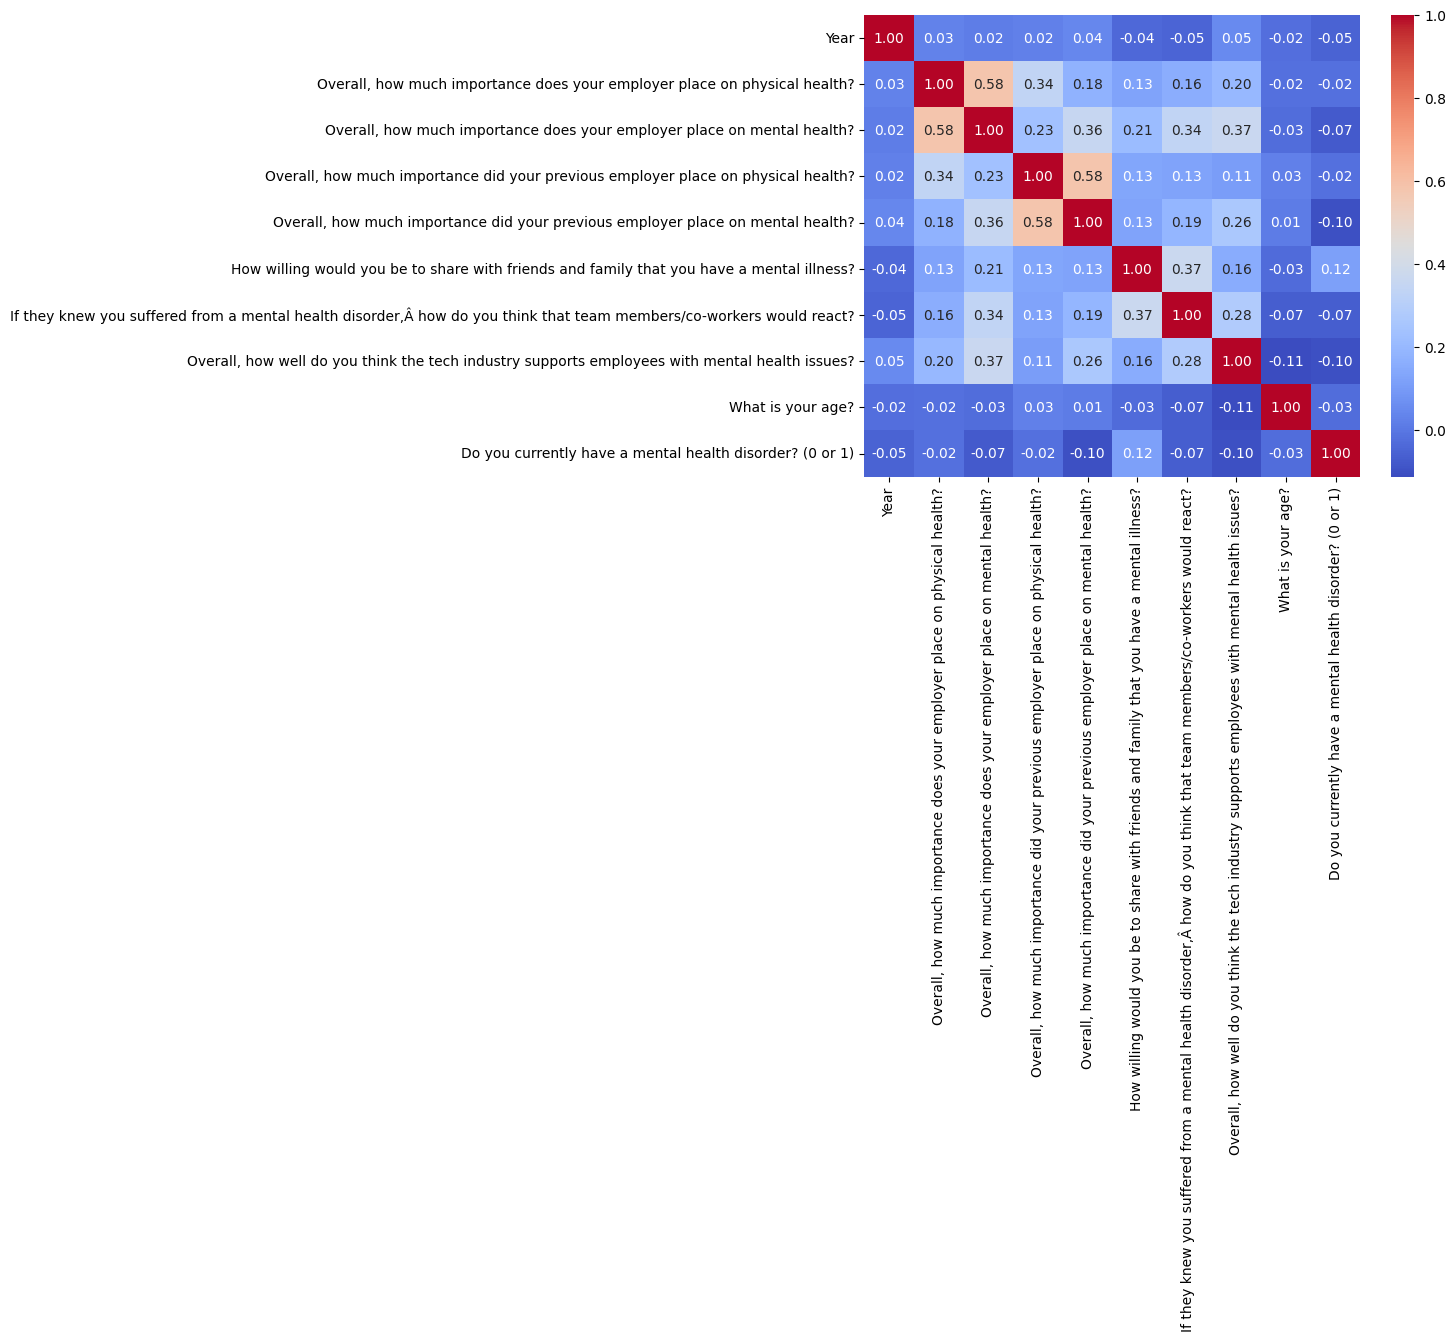

In [ ]:
# draw a correlation heatmap for the columns with float or integer values and the target column
plt.figure(figsize=(8, 6))
sns.heatmap(df[float_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

Overall, the correlations between the target variable and the other numerical features is weak. Observations:
- there is light correlation of the target variable with the  willigness to share mental illness information with family and friends? in other words, the more likely it is for people to acknowledge their mental health issues with their close ones, the more likely it is for them to actually identify themselves with mental health issues with a survey
- there is a strong correlation between the importance that employers put on mental an physical health
- there is a mild correlation between the importance that the previous and current employer places on mental health. in other words, when switching jobs, employees look to stay with employers who put weight on mental health

## Ordinal encoding of categorical variables
To extract more valuable insights from the dataset, we can compute the correlation factor between some of the categorical features and the target variables. Concretely, we can assign numeric values to the categories based on their ordering or rank. Once we encode the categorical features as ordinal variables, we can then calculate the correlation coefficient (e.g., using techniques like Spearman's rank correlation) to measure the strength and direction of the monotonic relationship between the ordinal variables and the target variable.

In [ ]:
# select the columns that have at most 4 unique values and are not among the float_cols
categorical_cols = [c for c in df.columns if df[c].nunique() <= 4 and c not in float_cols+[target_col, target_col_bool]]

In [ ]:
# check the percentage of missing values in the categorical columns
df[categorical_cols].isnull().mean().sort_values(ascending=False).head()

Do you know the options for mental health care available under your employer-provided health coverage?                                                                           0.224148
Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?    0.202032
Did you ever have a previous coworker discuss their or another coworker's mental health with you?                                                                                0.157800
Did you ever discuss your mental health with a previous coworker(s)?                                                                                                             0.154812
Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?                                                0.150030
dtype: float64

In [ ]:
# consider only the categorical columns with 0% missing values
categorical_cols_clean = [c for c in categorical_cols if df[c].isnull().mean() == 0]

In [ ]:
# map the categorical columns to 0 and 1, and 2;

# print all unique values in the categorical columns
unique_values = set()
for col in categorical_cols_clean:
    for val in df[col].unique():
        unique_values.add(val)

# print the unique values to see if they can be mapped to 0 and 1
print(unique_values)

yes_no_maybe_mapping = {'No': 0, 'Maybe': 1, 'Yes': 2}
true_false_mapping = {"FALSE": 0, 'TRUE': 1}

# map the categorical columns to 0 and 1, and 2;
for col in categorical_cols_clean:
    unique_values = df[col].unique()
    if 'No' in unique_values and 'Yes' in unique_values:
        df[col] = df[col].map(yes_no_maybe_mapping)
    elif 'FALSE' in unique_values and 'TRUE' in unique_values:
        df[col] = df[col].map(true_false_mapping)
    else:
        print(col, unique_values)
# fill the missing values in the categorical columns with the mode of the column
df[categorical_cols_clean] = df[categorical_cols_clean].fillna(df[categorical_cols_clean].mode().iloc[0])

{'No', '0', "I don't know", '1', 'TRUE', 'Yes', 'FALSE', 'Maybe'}


## Categorical variables correlation matrix

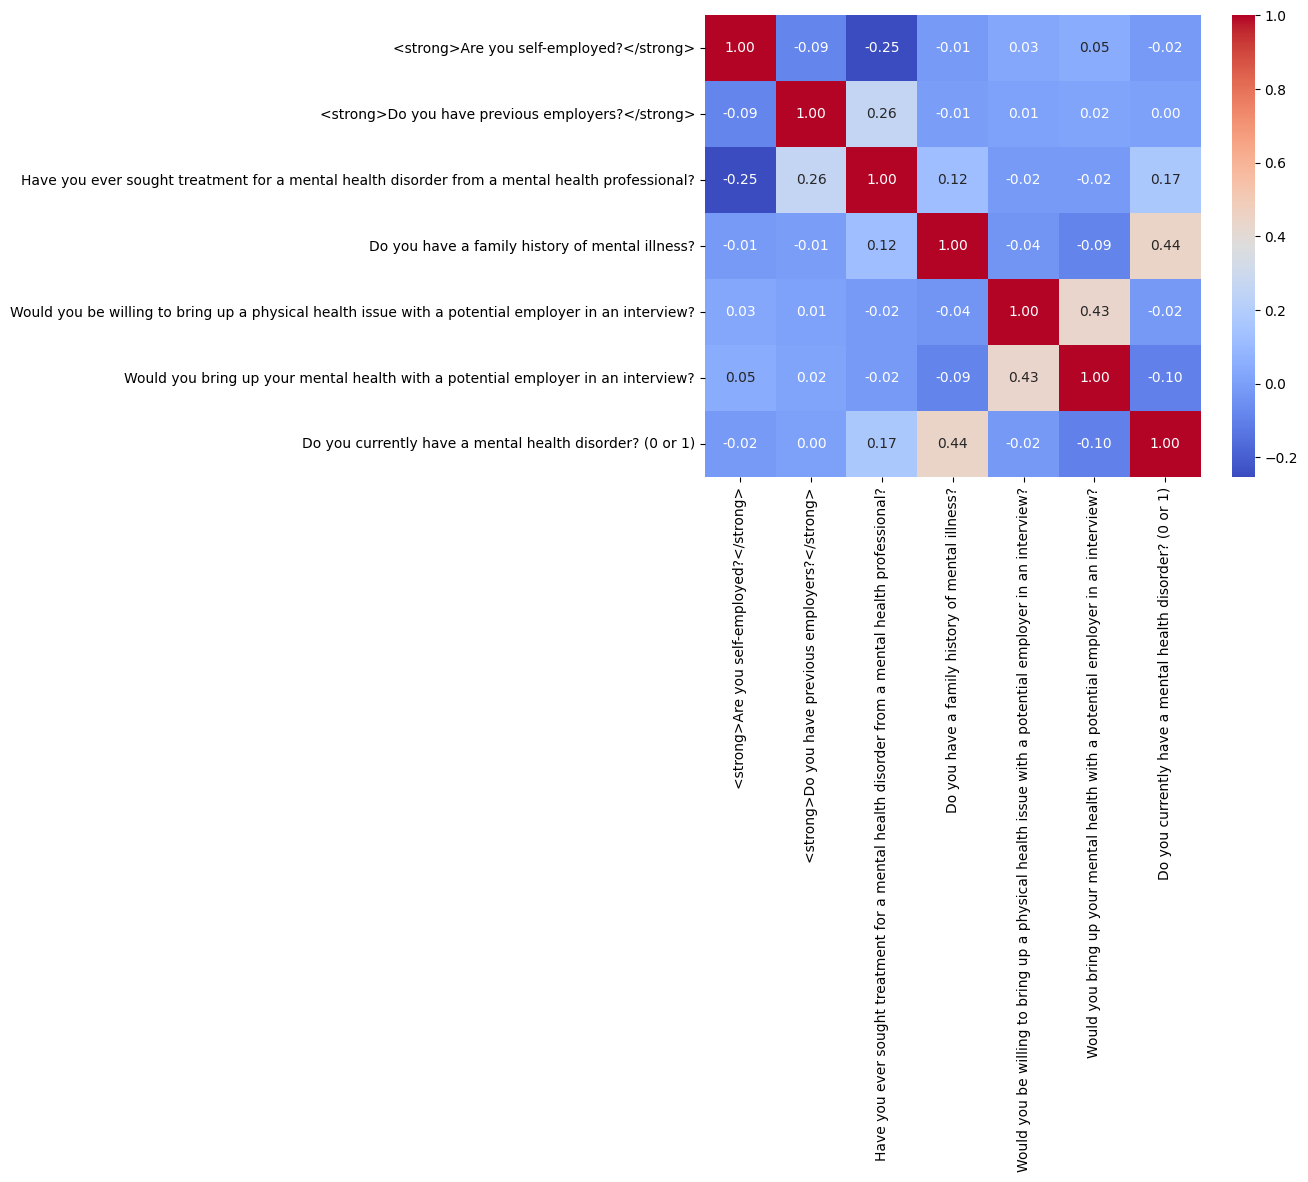

In [ ]:
# draw a correlation heatmap for the cleaned and ordinally encoded categorical columns and the target column
plt.figure(figsize=(8, 6))
sns.heatmap(df[categorical_cols_clean+[target_col_bool]].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

### Interpretation
- There is a strong correlation between the family history of mental illnesses and the mental health disorders of the respondents
- There is a weaker correlation between having mental disorders and seaking out support from mental health professionals
- Interestingly, respondents with multiple past employers are more likely to have sought professional mental health treatment
- Respondents who can speak openly about physical health issues are also more likely to speak up about mental health in an interview with a potential employer

## Cross-validation accross time

In [ ]:
# check the number of samples in each year
df['Year'].value_counts()

Year
2017    691
2018    384
2019    325
2020    157
2021    116
Name: count, dtype: int64

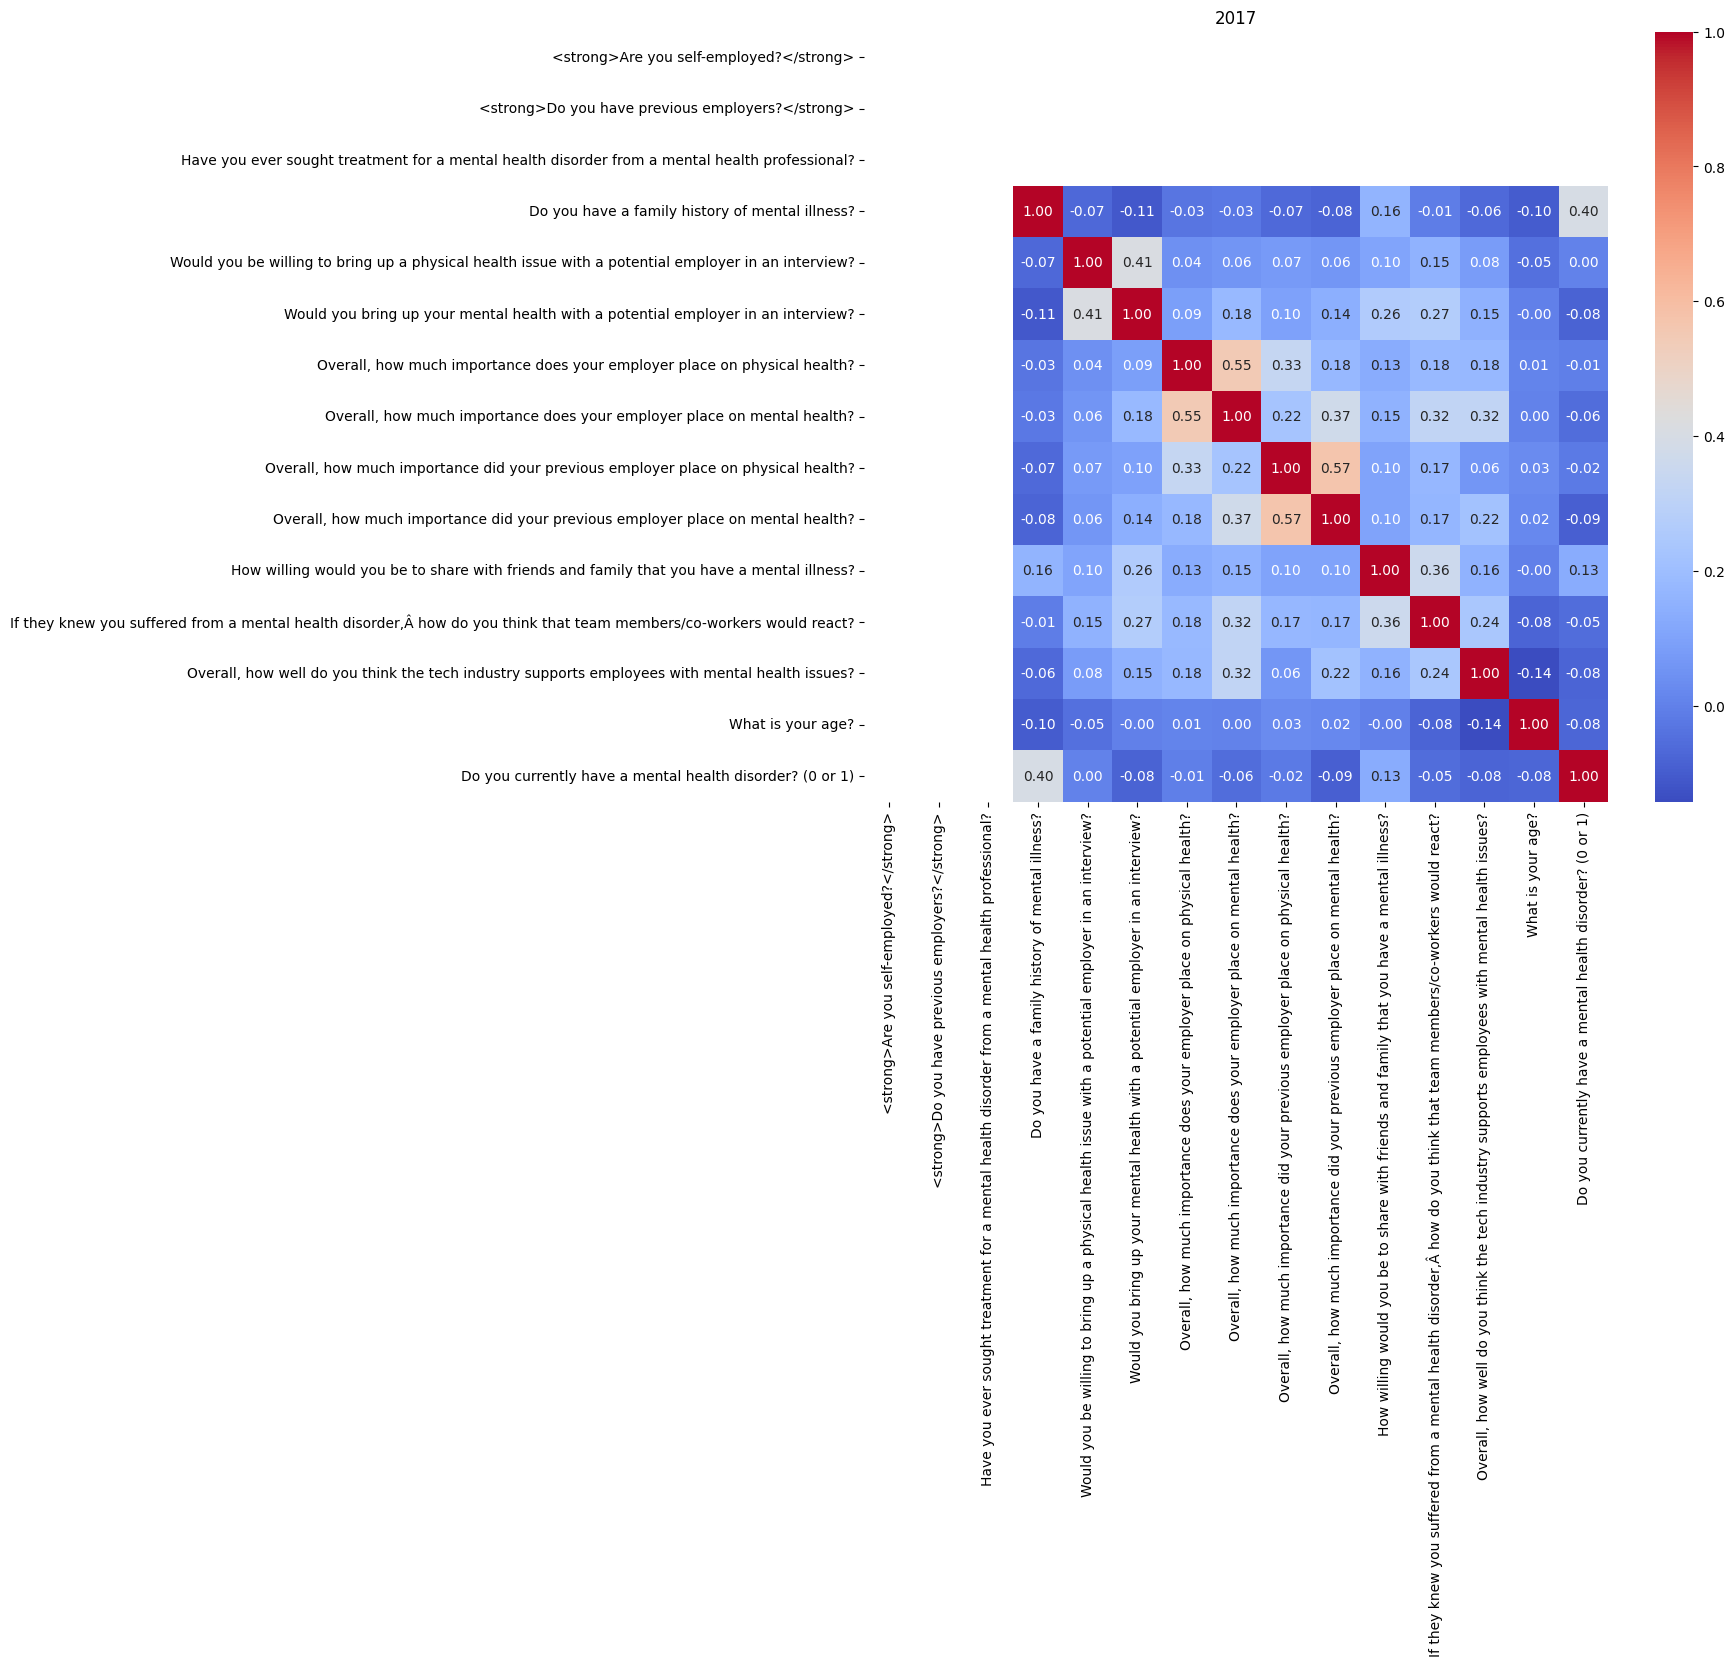

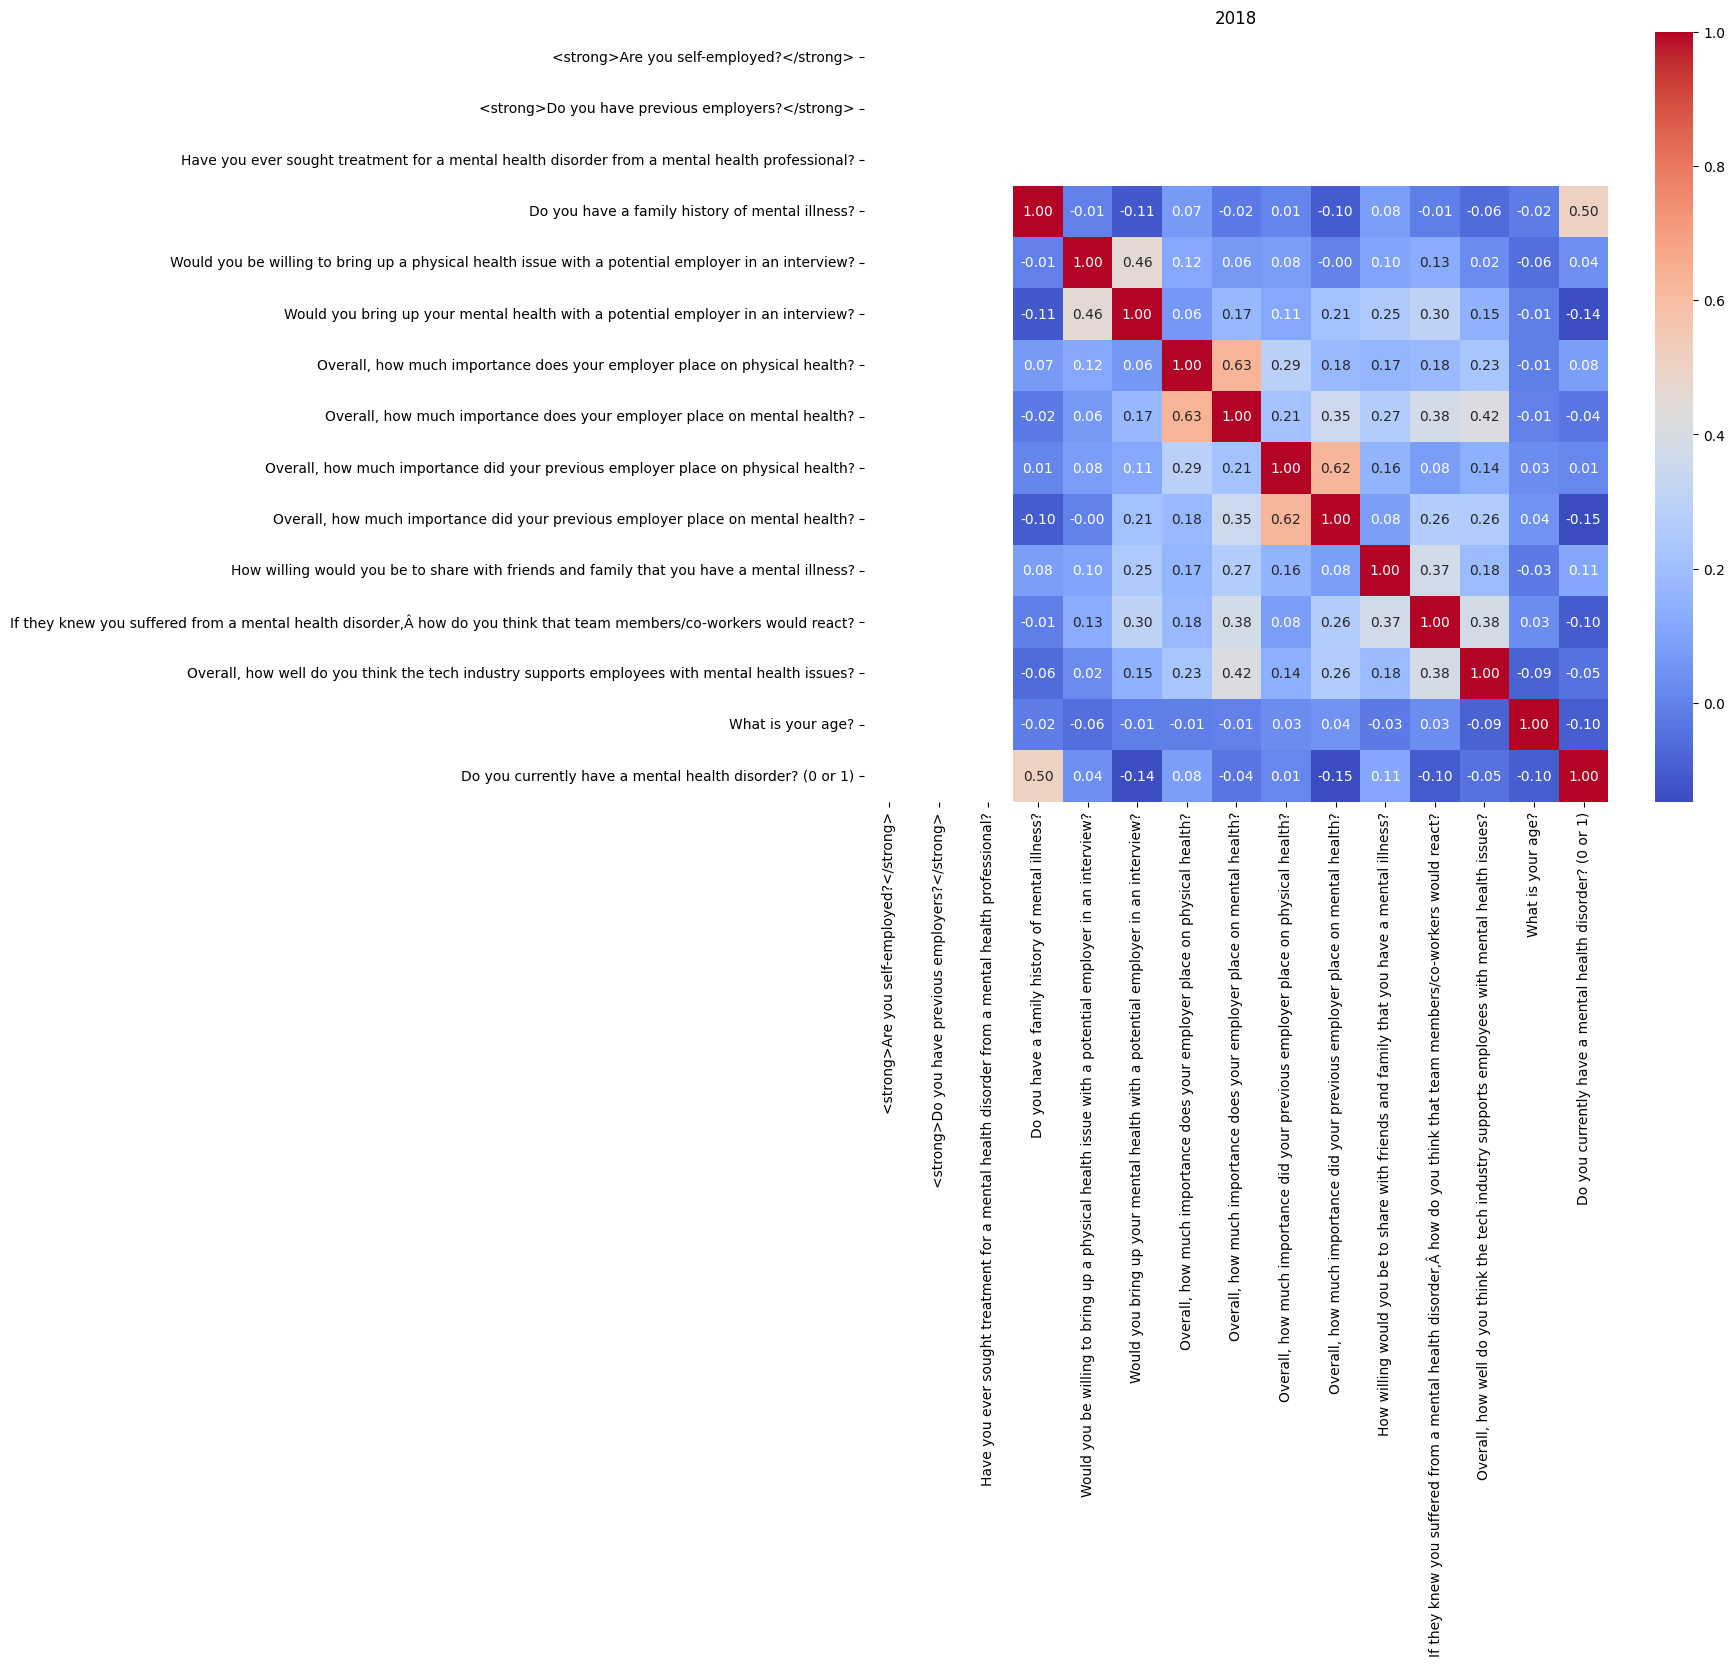

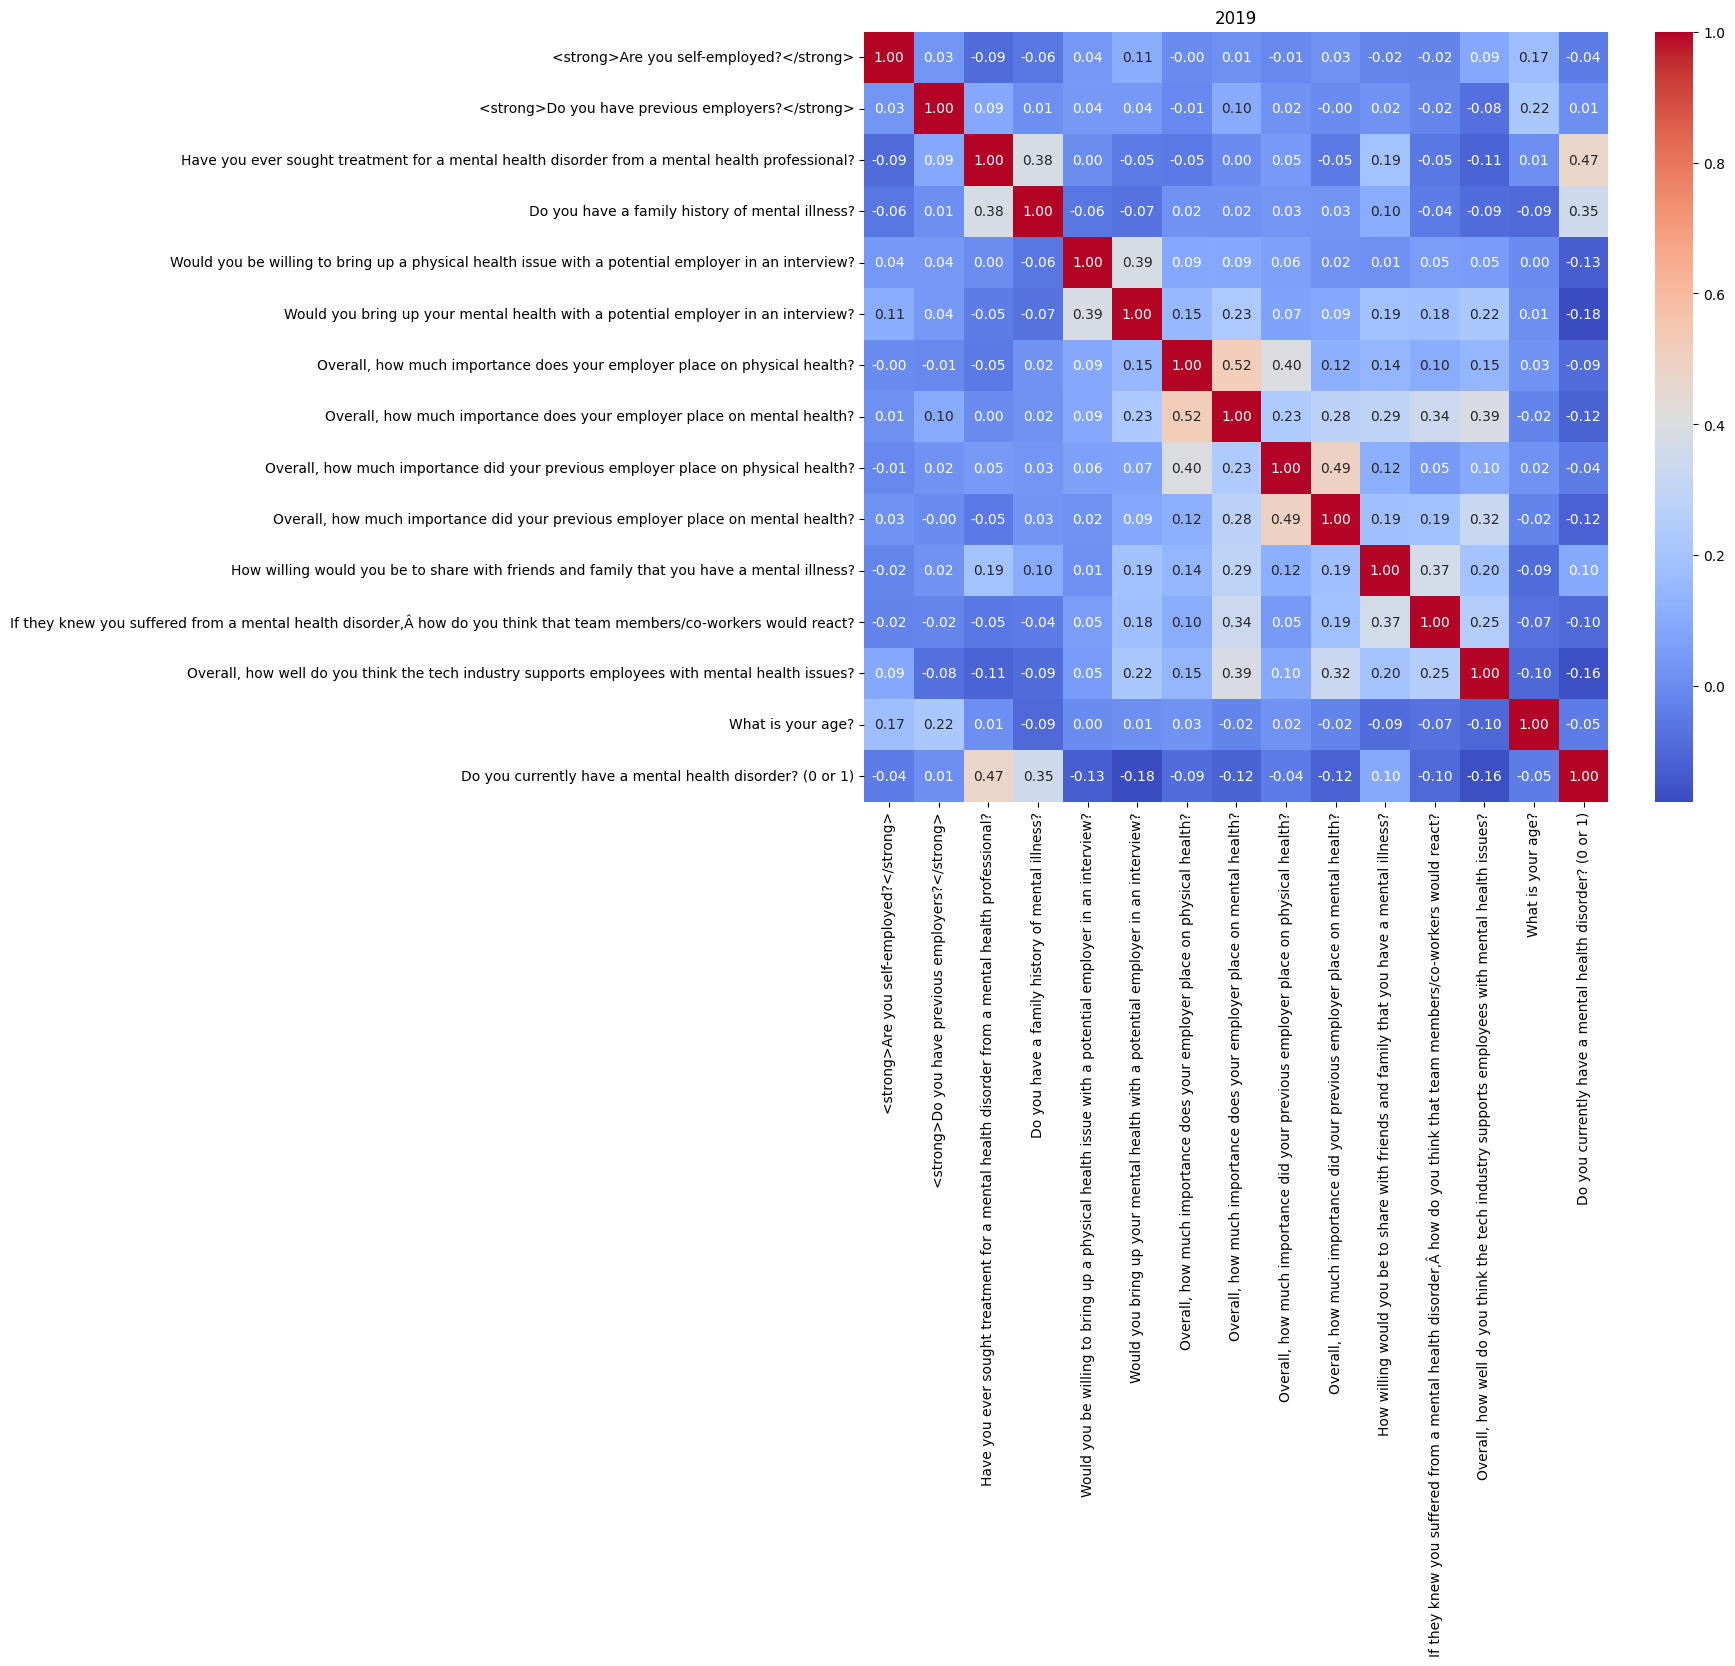

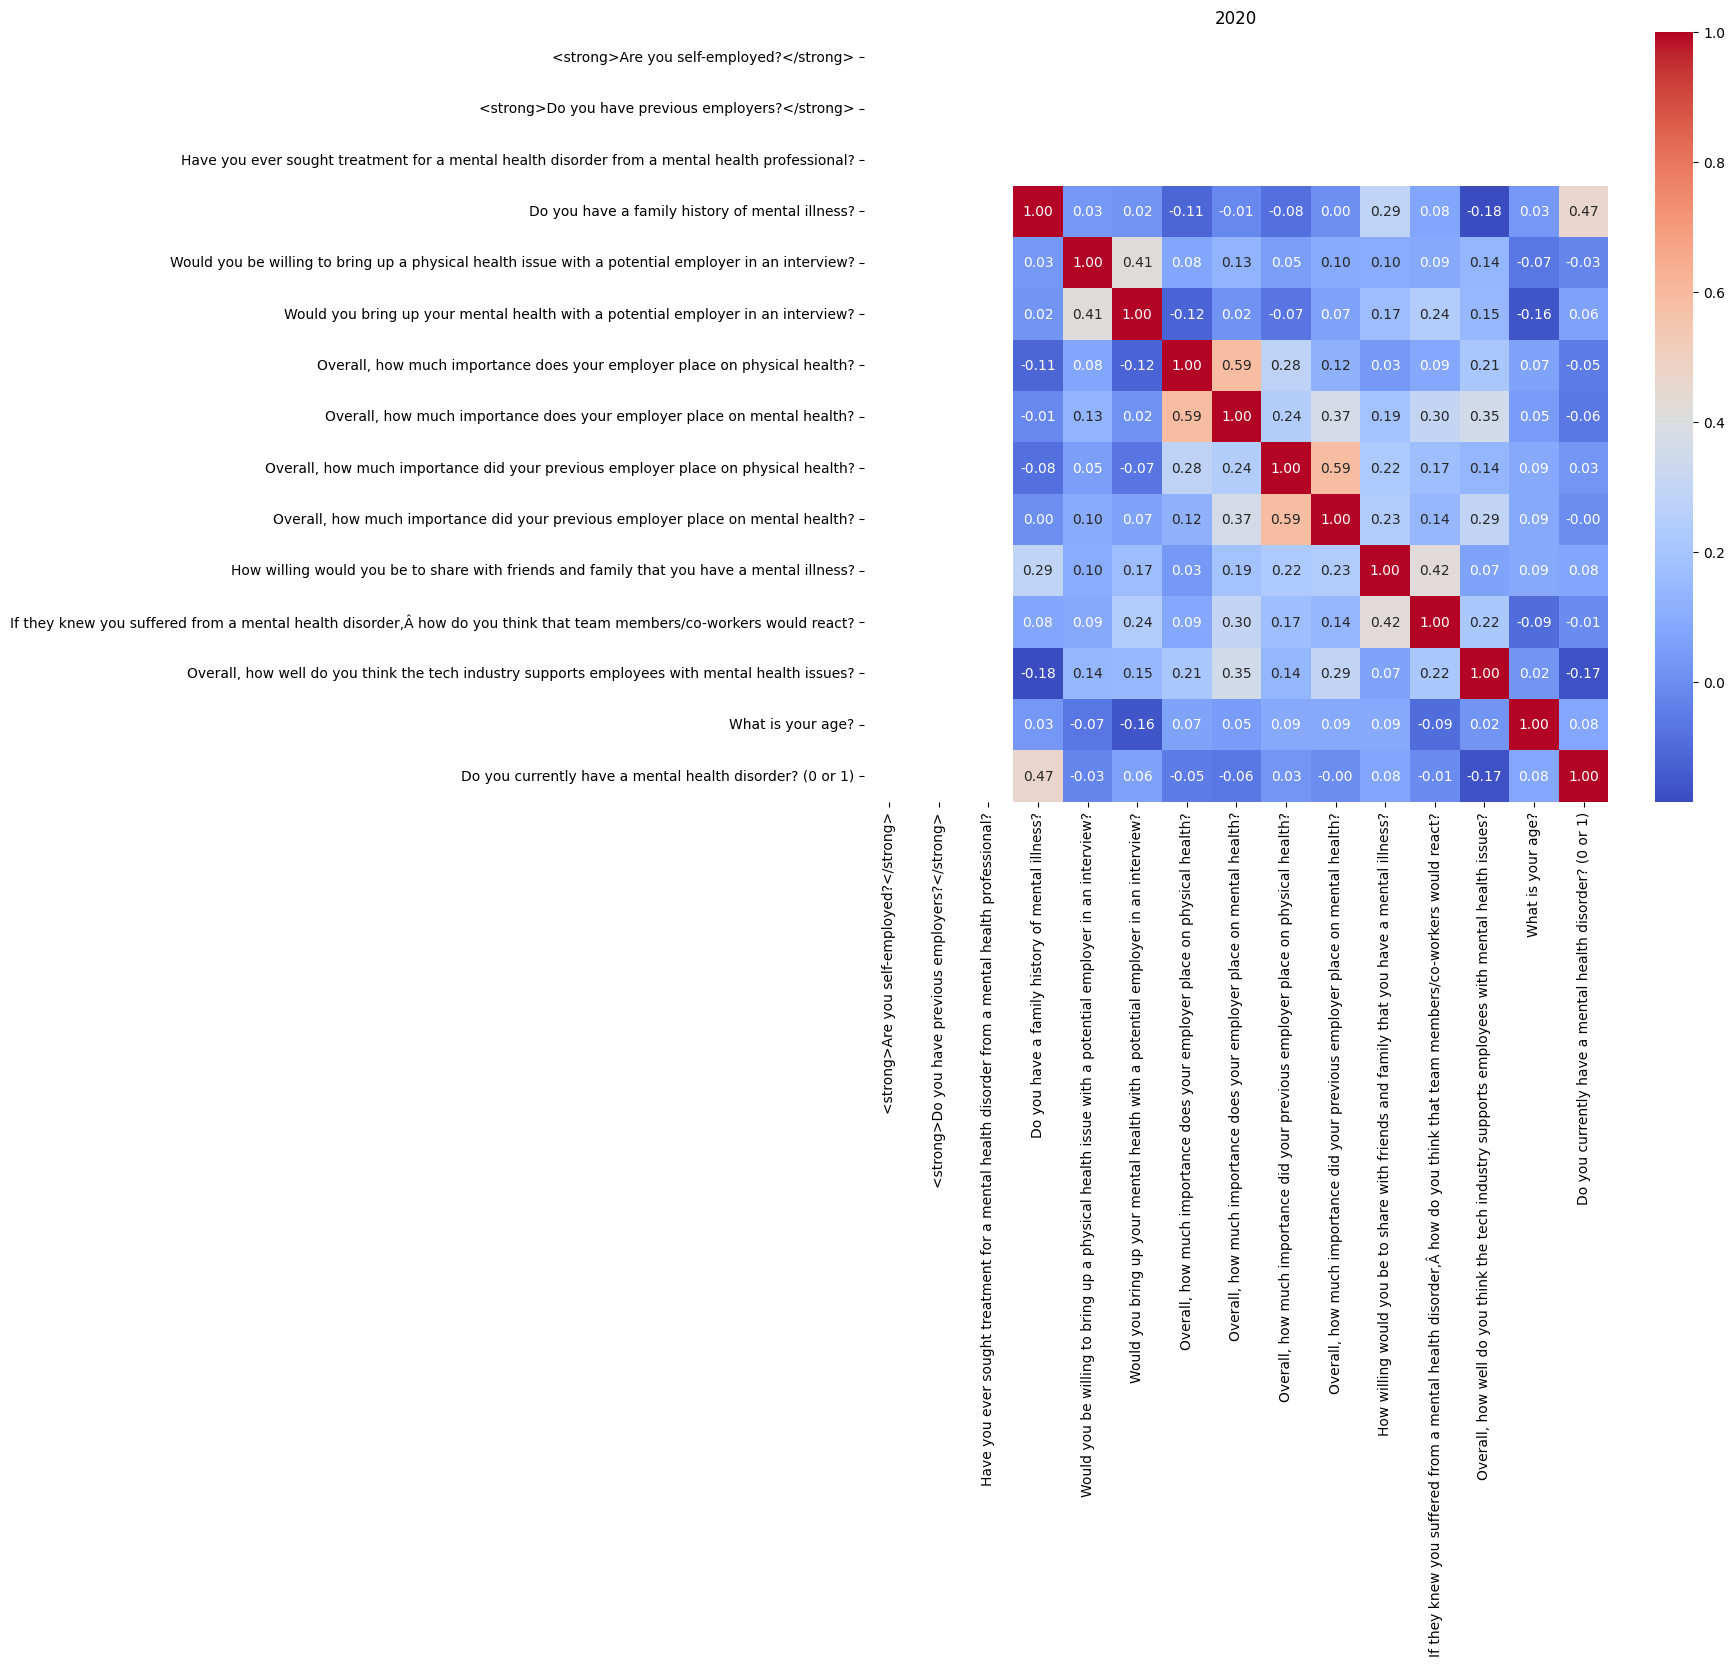

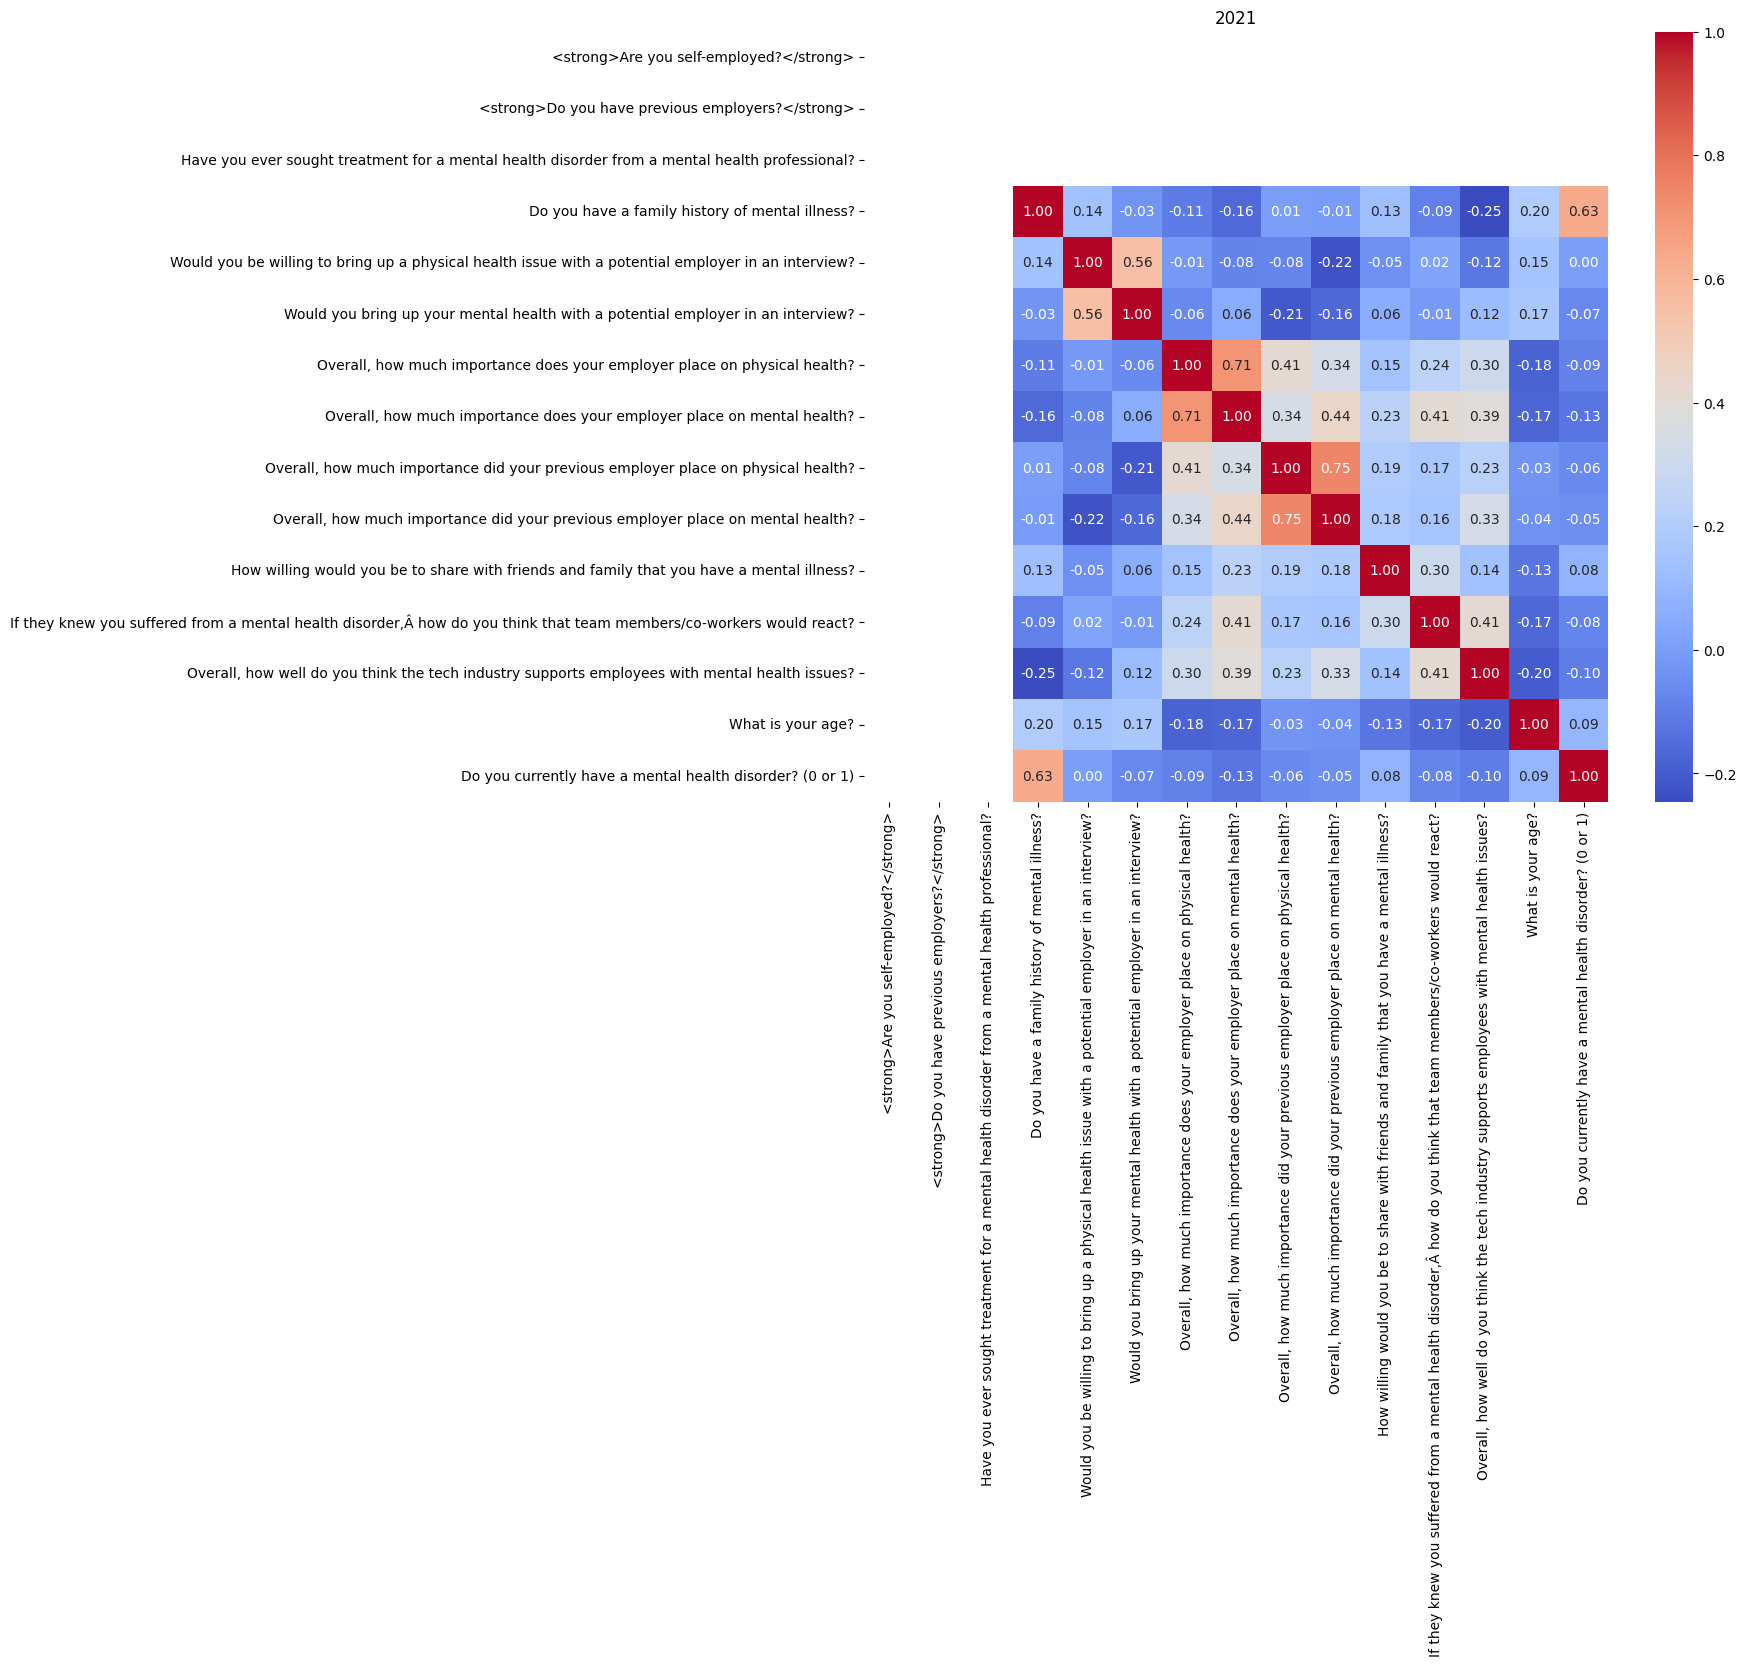

In [ ]:
combined_cols = [el for el in categorical_cols_clean + float_cols if el != 'Year']
# draw a correlation heatmap for the combined columns and the target column for each year
for year in df['Year'].unique():
    plt.figure(figsize=(12, 10))
    sns.heatmap(df[df['Year'] == year][combined_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title(year)
    plt.show()

### Observations:
1. The correlation between the family history of mental ilnesses and the target variable holds true for all years in the survey. Between 47% and 63% of respondents with mental health disorders have had a family history in all years surveyed
2. The cross-validation revealed another feature that correlates with the target variable, namely if the individual ever sought treatment from a mental health professional. 47% of the respondents with mental health conditions in 2019, the only year when this question was asked, also sought professional treatment
3. Interestingly, as opposed to years 2018-2019, the respondents from 2020 and 2021 would be more likely to bring up their mental health with a potential employer in an interview.

# Overall conclusions:

Firstly, a strong correlation has been identified between the family history of mental illnesses and the presence of mental health disorders among the respondents. This suggests that individuals with a family history of mental illnesses may be more susceptible to experiencing mental health issues themselves.

Additionally, a weaker correlation has been found between having mental disorders and seeking support from mental health professionals. This implies that while some individuals with mental health disorders do seek professional help, there is a significant portion that may not actively pursue such support.

Interestingly, the data indicates that respondents with multiple past employers are more likely to have sought professional mental health treatment. This suggests that job changes may serve as an opportunity for individuals to address their mental health needs.

Furthermore, the analysis reveals that individuals who are comfortable speaking openly about physical health issues are also more likely to discuss their mental health during an interview with a potential employer. This highlights the importance of creating an environment where individuals feel empowered to address mental health concerns in the workplace.

Moreover, a light correlation has been observed between the willingness of individuals to share information about their mental illness with family and friends and their identification of themselves with mental health issues in a survey. This suggests that individuals who are more open about their mental health with close ones are more likely to acknowledge and report their own mental health issues in a survey.

The analysis also indicates a strong correlation between the importance that employers place on both mental and physical health. This emphasizes the significance of employers recognizing and prioritizing the mental well-being of their employees alongside physical health.

Furthermore, a mild correlation has been found between the importance placed on mental health by previous and current employers. This suggests that individuals, when switching jobs, seek employers who value and prioritize mental health support.

Lastly, it is noteworthy that respondents from 2020 and 2021 were more likely to bring up their mental health with a potential employer during an interview compared to previous years. This may indicate a growing trend of increased openness and awareness surrounding mental health in the workplace.

Overall, these findings highlight the interconnectedness of various factors such as family history, seeking professional treatment, workplace environment, and societal attitudes towards mental health. They underscore the importance of promoting mental health awareness, support, and destigmatization within both personal and professional spheres.